### Descrição dos atributos da base de dados:

- #### AnoLetivo: anos(2019, 2020 e 2021)
- #### ID_Aluno: Indetificação escolar do aluno
- #### Genero: Sexo( F = feminino, M = masculino)
- #### Tipo_Serie: Ensino Fundamental - ( A = Anos Iniciais: 1ª a 5ª série, B = Anos finais: 6ª a 9ª série)
- #### Grup_Economic: classees economicas ( A, B, C, D e E)
- #### Frequencia_aluno_Aula(%): 
- #### Media_geral_notas_aluno: 
- #### status_aluno: situação do aluno( 0 = aprovado, 1 = aprovado parcialmente e 2 = reforço)

## Setup

In [2]:
#Data Manipulation
import numpy as np
import pandas as pd
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn.objects as so
#import graphviz
from matplotlib.colors import ListedColormap
#Machine Learning Library
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
plt.rcParams["figure.figsize"]=(15,10)
sb.set(rc={"figure.figsize":(10,6)})
import pickle
#from sklearn.model_selection import train_test_split
#from sklearn import tree #Árvore de decisão
#from sklearn.naive_bayes import GaussianNB #Bayes
#from sklearn.linear_model import LinearRegression #Regressão Linear
#from sklearn.linear_model import LogisticRegression #Regressão Logística
#from sklearn import svm #Máquina de Vetor de Suporte
#import statsmodels.api as sm
#from sklearn.metrics import classification_report
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import confusion_matrix

## Leitura e carregamento da base

In [4]:
dados = pd.read_csv("status_student_academic_perfomance.csv")
dados.head()

,Unnamed: 0,AnoLetivo,ID_Aluno,Genero,Tipo_Serie,Grup_Economic,Frequencia_aluno_Aula(%),Media_geral_notas_aluno,status_aluno,StudentAcademic_Performance_Status
0,0,2019,5458,M,Grup B - anos finais,E,60,3,2,Reforço
1,1,2019,5231,F,Grup A - anos iniciais,E,93,8,0,Aprovado
2,2,2019,4571,M,Grup B - anos finais,C,80,6,0,Aprovado
3,3,2019,2130,M,Grup B - anos finais,D,55,2,2,Reforço
4,4,2019,4871,M,Grup A - anos iniciais,E,82,9,0,Aprovado


## Informações básicas sobre o conjunto de dados

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unnamed: 0                          2997 non-null   int64 
 1   AnoLetivo                           2997 non-null   int64 
 2   ID_Aluno                            2997 non-null   int64 
 3   Genero                              2997 non-null   object
 4   Tipo_Serie                          2997 non-null   object
 5   Grup_Economic                       2997 non-null   object
 6   Frequencia_aluno_Aula(%)            2997 non-null   int64 
 7   Media_geral_notas_aluno             2997 non-null   int64 
 8   status_aluno                        2997 non-null   int64 
 9   StudentAcademic_Performance_Status  2997 non-null   object
dtypes: int64(6), object(4)
memory usage: 234.3+ KB


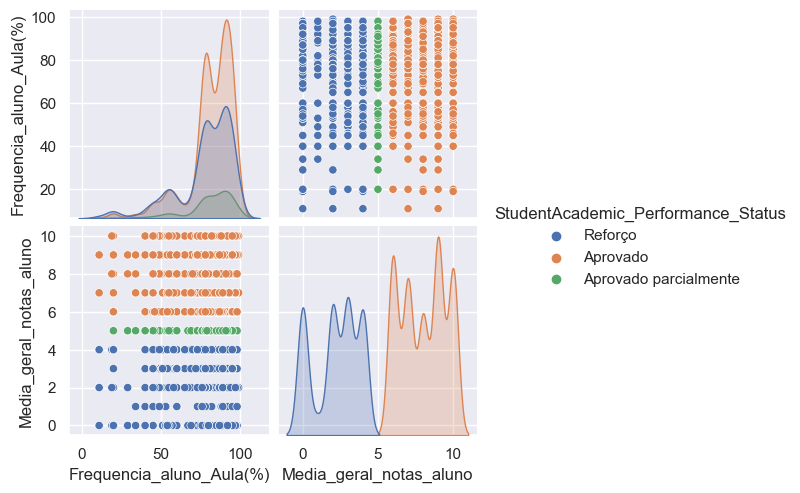

In [6]:
#Pair Plot
sb.pairplot(dados[["Frequencia_aluno_Aula(%)", "Media_geral_notas_aluno", "StudentAcademic_Performance_Status"]], hue="StudentAcademic_Performance_Status")

## Limpeza e ajuste da base

In [7]:
#Delete colunas desnecessárias para processamento do model
df_check = dados.drop(['Unnamed: 0'], axis=1)
df_check.head()

,AnoLetivo,ID_Aluno,Genero,Tipo_Serie,Grup_Economic,Frequencia_aluno_Aula(%),Media_geral_notas_aluno,status_aluno,StudentAcademic_Performance_Status
0,2019,5458,M,Grup B - anos finais,E,60,3,2,Reforço
1,2019,5231,F,Grup A - anos iniciais,E,93,8,0,Aprovado
2,2019,4571,M,Grup B - anos finais,C,80,6,0,Aprovado
3,2019,2130,M,Grup B - anos finais,D,55,2,2,Reforço
4,2019,4871,M,Grup A - anos iniciais,E,82,9,0,Aprovado


In [7]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   AnoLetivo                           2997 non-null   int64 
 1   ID_Aluno                            2997 non-null   int64 
 2   Genero                              2997 non-null   object
 3   Tipo_Serie                          2997 non-null   object
 4   Grup_Economic                       2997 non-null   object
 5   Frequencia_aluno_Aula(%)            2997 non-null   int64 
 6   Media_geral_notas_aluno             2997 non-null   int64 
 7   status_aluno                        2997 non-null   int64 
 8   StudentAcademic_Performance_Status  2997 non-null   object
dtypes: int64(5), object(4)
memory usage: 210.9+ KB


## Pré-processamento

In [8]:
df = df_check
df.head()

,AnoLetivo,ID_Aluno,Genero,Tipo_Serie,Grup_Economic,Frequencia_aluno_Aula(%),Media_geral_notas_aluno,status_aluno,StudentAcademic_Performance_Status
0,2019,5458,M,Grup B - anos finais,E,60,3,2,Reforço
1,2019,5231,F,Grup A - anos iniciais,E,93,8,0,Aprovado
2,2019,4571,M,Grup B - anos finais,C,80,6,0,Aprovado
3,2019,2130,M,Grup B - anos finais,D,55,2,2,Reforço
4,2019,4871,M,Grup A - anos iniciais,E,82,9,0,Aprovado


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#Converção do DF em binário
#for c in df.columns:
    #if df[c].dtype=='object': 
        #lbl = LabelEncoder()
        #lbl.fit(list(df[c].values))
        #df[c] = lbl.transform(df[c].values)

#df.head(15)

            
#Genero                               0:F  1:M

#Tipo_Serie                           0:A  1:B

#Grup_Economic                        0:A 1:B 2:C 3:D 4:E

#StudentAcademic_Performance_Status   0:Aprovado 
#                                     1:Aprovado parcialmente
#                                     2:Reforço                        

#### Check distribuições da Frequência dos alunos nas aulas e media geral das notas de alunos

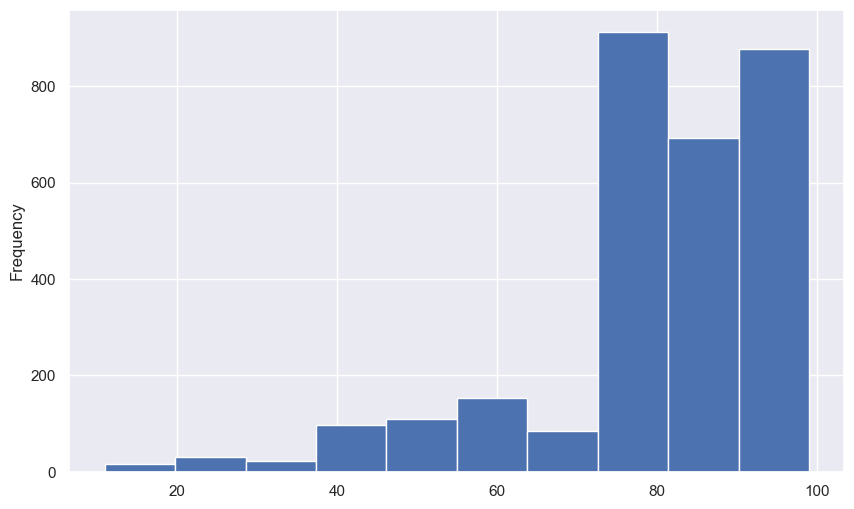

In [9]:
df["Frequencia_aluno_Aula(%)"].plot.hist()
plt.show()

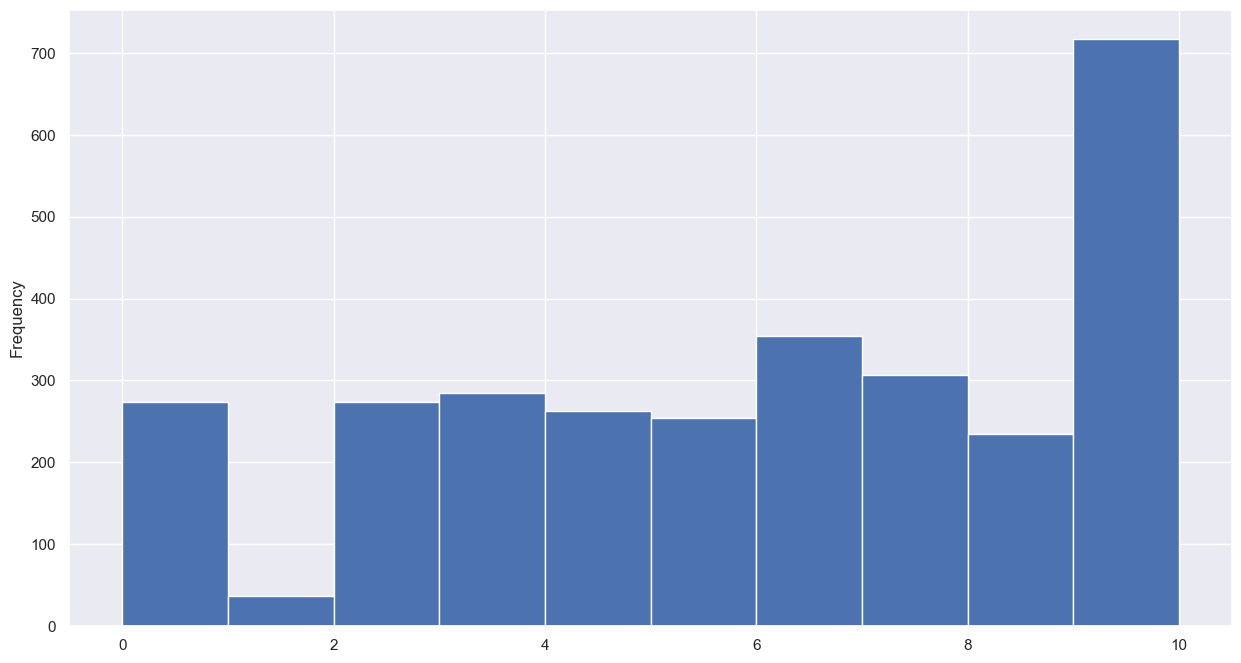

In [12]:
df["Media_geral_notas_aluno"].plot.hist()
plt.show()

In [ ]:
#df[""].describe().T

#### Check distribuição espacial dos dados

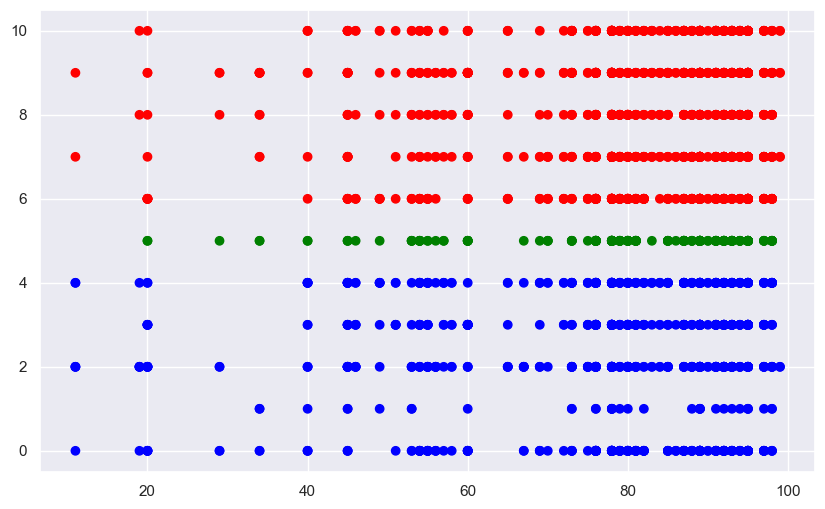

In [10]:
fig, ax = plt.subplots()
colors = {0:'red', 1:'green', 2:'blue'}
ax.scatter(df["Frequencia_aluno_Aula(%)"], df["Media_geral_notas_aluno"], c=df["status_aluno"].map(colors))
plt.show()

#### Conjunto de dados entre treinamento (80%) e teste (20%)

In [11]:
atributos = df[['Frequencia_aluno_Aula(%)','Media_geral_notas_aluno']]
classes = df['status_aluno']

In [12]:
df_treino, df_teste, classes_treino, classes_teste = train_test_split(atributos, classes, test_size = 0.1)

#### Redução da escala dos dados para acelerar a execução do treinamento do modelo e da geração do gráfico de visualização dos resultados

In [13]:
scaler = StandardScaler()
df_treino = scaler.fit_transform(df_treino)
df_teste = scaler.transform(df_teste)

##### Plotagem do resultado checando como o modelo classifica o conjunto de testes. Para isso,cria - se uma função que usa as funções meshgrid do numpy, que cria um grid retangular, e contourf do matplotlib, que permite criar linhas e preencher áreas com cores.

In [14]:
#função que recebe os atributos e classes do conjunto de testes, o classificador SVM e plota os resultados
def visualizarSVM(atributos_t,classes_t,classificador):
  atributos, classes = atributos_t, classes_t

  frequencia_aula_aluno, nota_aluno = np.meshgrid(np.arange(start = atributos[:, 0].min() - 1, stop = atributos[:, 0].max() + 1, step = 0.01),
                      np.arange(start = atributos[:, 1].min() - 1, stop = atributos[:, 1].max() + 1, step = 0.01))

  plt.contourf(frequencia_aula_aluno, nota_aluno, classificador.predict(np.array([frequencia_aula_aluno.ravel(), nota_aluno.ravel()]).T).reshape(frequencia_aula_aluno.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

  plt.xlim(frequencia_aula_aluno.min(), frequencia_aula_aluno.max())
  plt.ylim(nota_aluno.min(), nota_aluno.max())

  for i, j in enumerate(np.unique(classes)):
      plt.scatter(atributos[classes == j, 0], atributos[classes == j, 1],
                  color = ListedColormap(('red', 'green', 'blue'))(i), label = j)

  plt.title('Classificação SVM')
  plt.xlabel('Frequência do aluno nas aula')
  plt.ylabel('Media geral das notas do aluno')
  plt.legend()
  plt.show()

### Na fase a seguir: treinar o modelo para gerar o classificador usando a função kernel polinomial.
### Os seguintes parâmetros de funções de kernel podem ser usados para aprimorar o modelo:

- ### C: determina se a margem será mais ajustada (C grande) ou mais larga (C pequeno)
- ### gamma: parâmetro de ajuste para as funções polinomial e sigmoidal
- ### coef0: parâmetro kappa, constante usada nas funções polinomial e sigmoidal
- ### degree: grau da função polinomial

In [15]:
SVM_polinomial = SVC(kernel = 'poly', degree = 3, gamma = 'scale', C = 1.0, coef0 = 2)
SVM_polinomial.fit(df_treino, classes_treino)

SVC(coef0=2, kernel='poly')

### Verificando a acurácia de classificação

In [16]:
predicao = SVM_polinomial.predict(df_teste)
acuracia = accuracy_score(classes_teste,predicao)
print('Acurácia de classificação: {}'.format(round(acuracia,3)*100)+'%')

Acurácia de classificação: 100.0%


### plotando o classificador que usa a função polinomial

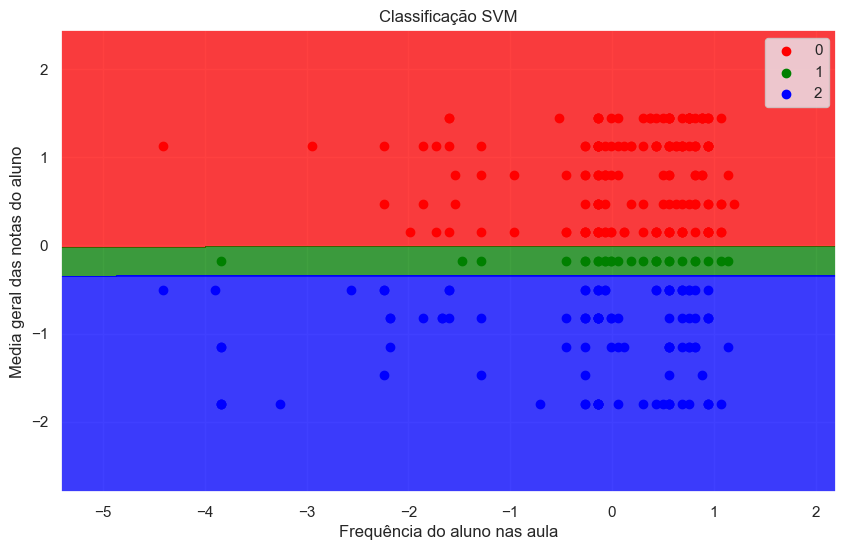

In [17]:
visualizarSVM(df_teste, classes_teste,SVM_polinomial)

In [23]:
#pickle.dump(SVM_polinomial, open("modelo.sav", "wb"))

### Treinando o modelo para gerar o classificador usando a função kernel polinomial

In [19]:
SVM_sigmoidal = SVC(kernel = 'sigmoid', gamma = 'scale', C = 0.2, coef0 = 2)
SVM_sigmoidal.fit(df_treino, classes_treino)

SVC(C=0.2, coef0=2, kernel='sigmoid')

In [20]:
predicao_sigmoidal = SVM_sigmoidal.predict(df_teste)
acuracia_sigmoidal = accuracy_score(classes_teste,predicao_sigmoidal)
print('Acurácia de classificação: {}'.format(round(acuracia_sigmoidal,3)*100)+'%')

Acurácia de classificação: 77.7%


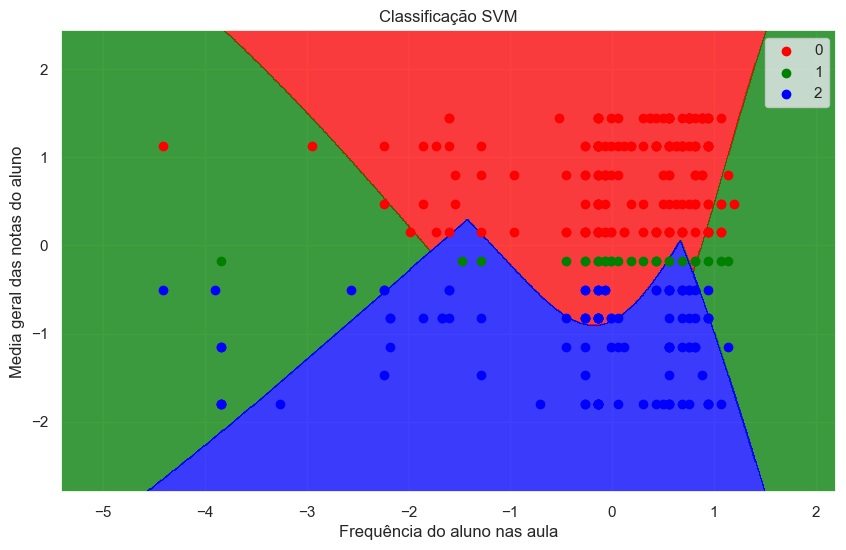

In [21]:
visualizarSVM(df_teste, classes_teste,SVM_sigmoidal)

In [24]:
#pickle.dump(SVM_sigmoidal, open("modelo_sigmoidal.sav", "wb"))